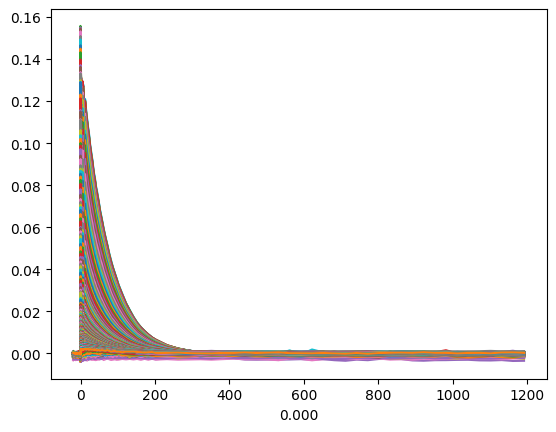

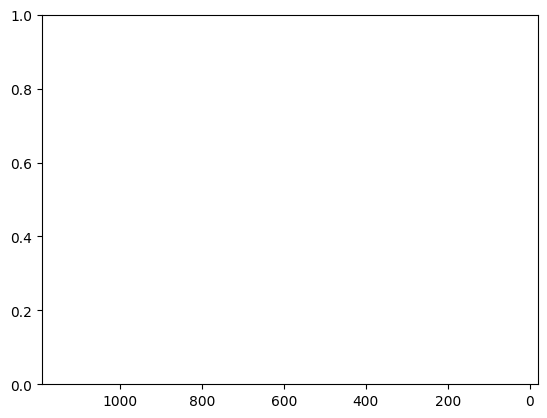

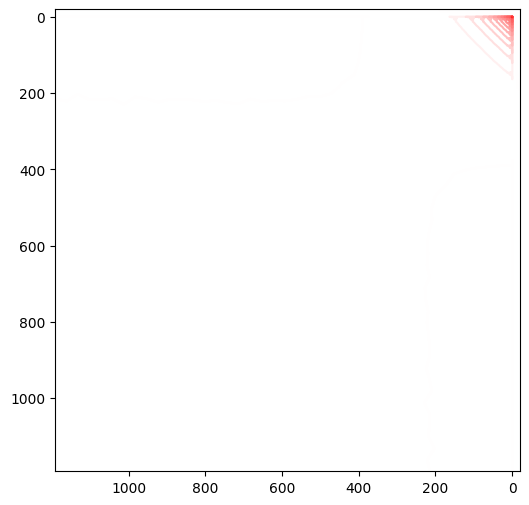

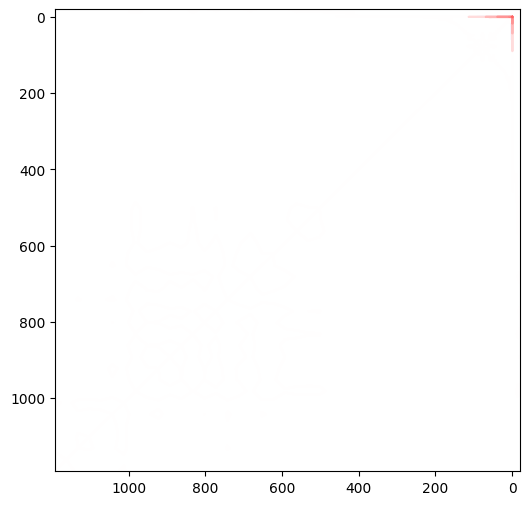

In [3]:
import math
import numpy
import pandas
from matplotlib import pyplot

hetero = False
inputfile1 = "DAS_ACN_10uL (1).csv"

# hetero=True
# inputfile1="spec1.csv"
# inputfile2="spec2.csv"

left_large = True
dynamic = True
num_contour = 16

# file read
spec1 = pandas.read_csv(inputfile1, header=0, index_col=0).T
if hetero == False: inputfile2 = inputfile1
spec2 = pandas.read_csv(inputfile2, header=0, index_col=0).T
if len(spec1) != len(spec2): raise Exception("data mismatching")
spec1.T.plot(legend=None)
pyplot.show()
if left_large: pyplot.xlim(max(spec1.columns), min(spec1.columns))
if hetero:
    spec2.T.plot(legend=None)
    if left_large:
        pyplot.xlim(max(spec2.columns), min(spec2.columns))
        pyplot.show()
if dynamic:
    spec1 = spec1 - spec1.mean()
    spec2 = spec2 - spec2.mean()

def contourplot(spec):
    x = spec.columns[0:].astype(float)
    y = spec.index[0:].astype(float)
    z = spec.values
    zmax = numpy.absolute(z).max()
    pyplot.figure(figsize=(6, 6))
    pyplot.contour(x, y, z, num_contour, cmap="bwr", vmin=-1 * zmax, vmax=zmax)
    # pyplot.pcolormesh(x,y,z,cmap='jet',vmin=-1*zmax,vmax=zmax)
    if left_large:
        pyplot.xlim(max(x), min(x))
        pyplot.ylim(max(y), min(y))
    pyplot.show()

# synchronous correlation
sync = pandas.DataFrame(spec1.values.T @ spec2.values / (len(spec1) - 1))
sync.index = spec1.columns
sync.columns = spec2.columns
sync = sync.T
contourplot(sync)
sync.to_csv(inputfile1[: len(inputfile1) - 4] + "_sync.csv")

# Hilbert-Noda transformation matrix
noda = numpy.zeros((len(spec1), len(spec1)))
for i in range(len(spec1)):
    for j in range(len(spec1)):
        if i != j: noda[i, j] = 1 / math.pi / (j - i)

# asynchronouse correlation
asyn = pandas.DataFrame(spec1.values.T @ noda @ spec2.values / (len(spec1) - 1))
asyn.index = spec1.columns
asyn.columns = spec2.columns
asyn = asyn.T
contourplot(asyn)
asyn.to_csv(inputfile1[: len(inputfile1) - 4] + "_async.csv")

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=0, index_col=0)

# Extract values
time = data.iloc.astype(float).values[:-1] #Data from first column, skipping header 
wavelengths = data.columns.astype(float)[:-1] # First row (wavelengths) from the second column
od_values = data.iloc[:-1, :-1].astype(float).values  # OD values (excluding headers)

# Print shapes to debug potential mismatches
print("Time Shape:", len(time))
print("Wavelength Shape:", len(wavelengths))
print("OD Values Shape:", od_values.shape)

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = data - data.mean(axis=0)

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths, columns=wavelengths)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
async_df = pd.DataFrame(async_matrix, index=wavelengths, columns=wavelengths)

# Define function for contour plots
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths, wavelengths)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=16, cmap='magma', vmin=-zmax, vmax=zmax)
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.gca().invert_xaxis()
    plt.show()

# Plot synchronous and asynchronous correlation spectra
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum')

# Save correlation matrices
sync_df.to_csv("DAS_ACN_10uL_sync.csv")
async_df.to_csv("DAS_ACN_10uL_async.csv")


AttributeError: '_iLocIndexer' object has no attribute 'astype'

Extracted Wavelengths Min: 194.55
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [194.55 195.59 196.64 197.68 198.72 199.76 200.81 201.85 202.89 203.94
 204.98 206.02 207.07 208.11 209.15 210.19 211.24 212.28 213.32 214.37
 215.41 216.45 217.5  218.54 219.58 220.62 221.67 222.71 223.75 224.8
 225.84 226.88 227.93 228.97 230.01 231.06 232.1  233.14 234.18 235.23
 236.27 237.31 238.36 239.4  240.44 241.49 242.53 243.57 244.61 245.66
 246.7  247.74 248.79 249.83 250.87 251.92 252.96 254.   255.04 256.09
 257.13 258.17 259.22 260.26 261.3  262.35 263.39 264.43 265.48 266.52
 267.56 268.6  269.65 270.69 271.73 272.78 273.82 274.86 275.91 276.95
 277.99 279.03 280.08 281.12 282.16 283.21 284.25 285.29 286.34 287.38
 288.42 289.46 290.51 291.55 292.59 293.64 294.68 295.72 296.77 297.81
 298.85 299.9  300.94 301.98 303.02 304.07 305.11 306.15 307.2  308.24
 309.28 310.33 311.37 312.41 313.45 314.5  315.54 316.58 317.63 318.67
 319.71 320.76 321.8  322.84 323.88 324.93 325.97 327.

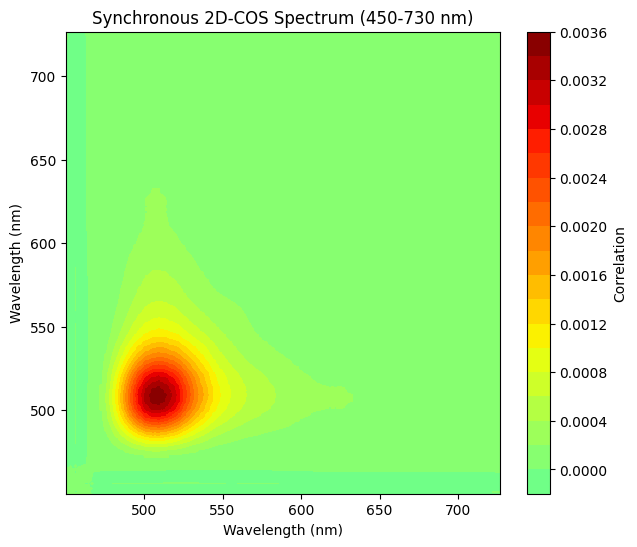

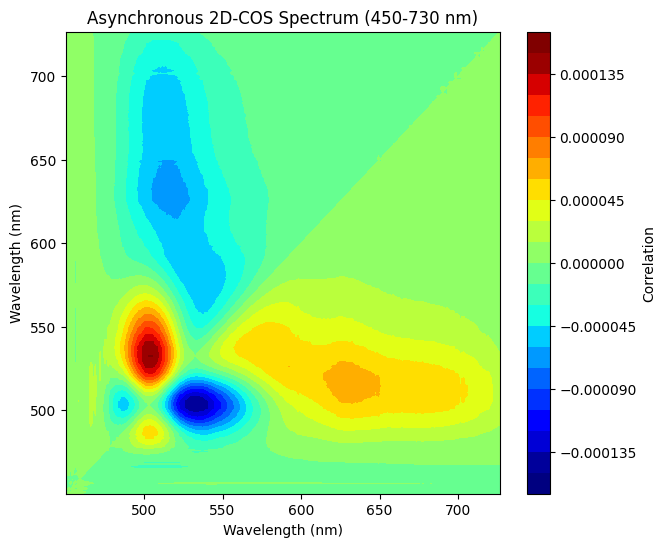

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (450-730 nm)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (450-730 nm)')

# Save correlation matrices
sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 194.55
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [194.55 195.59 196.64 197.68 198.72 199.76 200.81 201.85 202.89 203.94
 204.98 206.02 207.07 208.11 209.15 210.19 211.24 212.28 213.32 214.37
 215.41 216.45 217.5  218.54 219.58 220.62 221.67 222.71 223.75 224.8
 225.84 226.88 227.93 228.97 230.01 231.06 232.1  233.14 234.18 235.23
 236.27 237.31 238.36 239.4  240.44 241.49 242.53 243.57 244.61 245.66
 246.7  247.74 248.79 249.83 250.87 251.92 252.96 254.   255.04 256.09
 257.13 258.17 259.22 260.26 261.3  262.35 263.39 264.43 265.48 266.52
 267.56 268.6  269.65 270.69 271.73 272.78 273.82 274.86 275.91 276.95
 277.99 279.03 280.08 281.12 282.16 283.21 284.25 285.29 286.34 287.38
 288.42 289.46 290.51 291.55 292.59 293.64 294.68 295.72 296.77 297.81
 298.85 299.9  300.94 301.98 303.02 304.07 305.11 306.15 307.2  308.24
 309.28 310.33 311.37 312.41 313.45 314.5  315.54 316.58 317.63 318.67
 319.71 320.76 321.8  322.84 323.88 324.93 325.97 327.

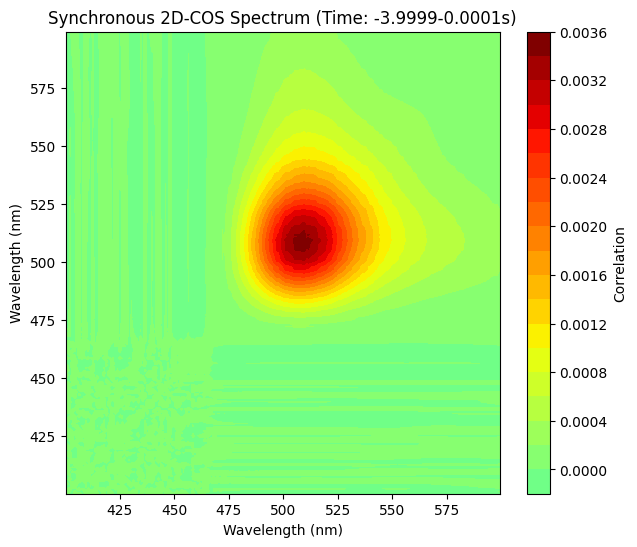

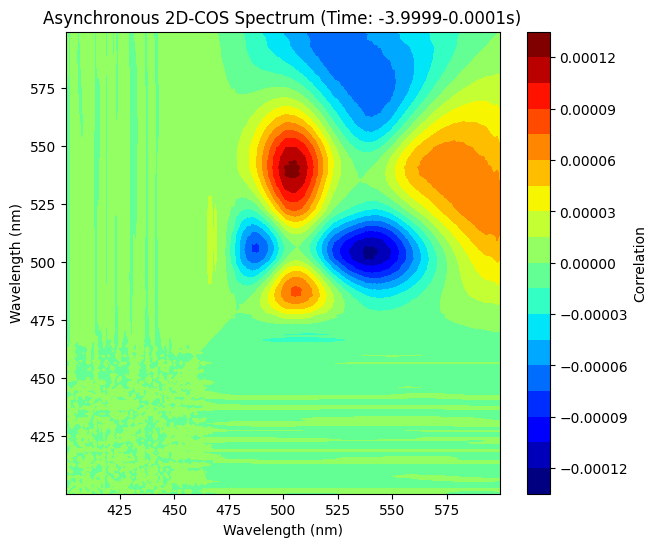

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 400 and 600 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 400 <= w <= 600]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (400-600 nm). Check dataset.")

# Define time window
T_MIN = -3.9999  # Set minimum time value (5)
T_MAX = 0.0001 # Set maximum time value (0)
time_filtered_indices = [i for i, t in enumerate(time) if T_MIN <= t <= T_MAX]
time_filtered = time[time_filtered_indices]
od_values_filtered = od_values_filtered[time_filtered_indices, :]

# Ensure valid time filtering
if time_filtered.size == 0:
    raise ValueError("No time points found in the specified range ({}-{}). Check dataset.".format(T_MIN, T_MAX))

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time_filtered) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time_filtered), len(time_filtered)))
for i in range(len(time_filtered)):
    for j in range(len(time_filtered)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time_filtered) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title + f" (Time: {T_MIN}-{T_MAX}s)")
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range and time window
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum')

# Save correlation matrices
#sync_df.to_csv("/mnt/data/DAS_ACN_10uL_sync_filtered.csv")
#async_df.to_csv("/mnt/data/DAS_ACN_10uL_async_filtered.csv")


Extracted Wavelengths Min: 194.55
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [194.55 195.59 196.64 197.68 198.72 199.76 200.81 201.85 202.89 203.94
 204.98 206.02 207.07 208.11 209.15 210.19 211.24 212.28 213.32 214.37
 215.41 216.45 217.5  218.54 219.58 220.62 221.67 222.71 223.75 224.8
 225.84 226.88 227.93 228.97 230.01 231.06 232.1  233.14 234.18 235.23
 236.27 237.31 238.36 239.4  240.44 241.49 242.53 243.57 244.61 245.66
 246.7  247.74 248.79 249.83 250.87 251.92 252.96 254.   255.04 256.09
 257.13 258.17 259.22 260.26 261.3  262.35 263.39 264.43 265.48 266.52
 267.56 268.6  269.65 270.69 271.73 272.78 273.82 274.86 275.91 276.95
 277.99 279.03 280.08 281.12 282.16 283.21 284.25 285.29 286.34 287.38
 288.42 289.46 290.51 291.55 292.59 293.64 294.68 295.72 296.77 297.81
 298.85 299.9  300.94 301.98 303.02 304.07 305.11 306.15 307.2  308.24
 309.28 310.33 311.37 312.41 313.45 314.5  315.54 316.58 317.63 318.67
 319.71 320.76 321.8  322.84 323.88 324.93 325.97 327.

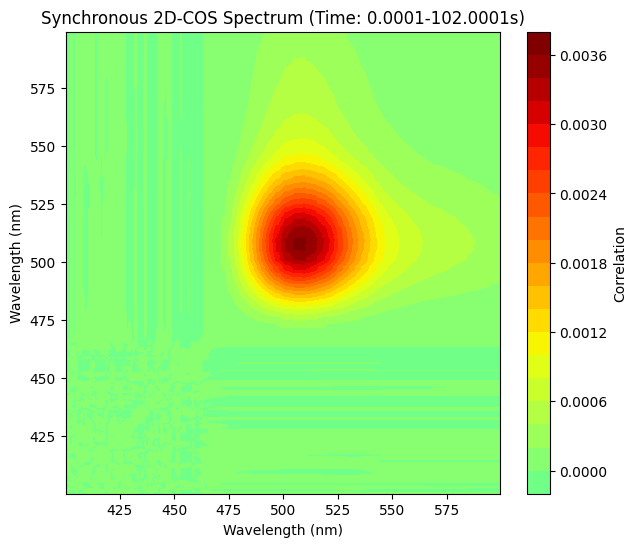

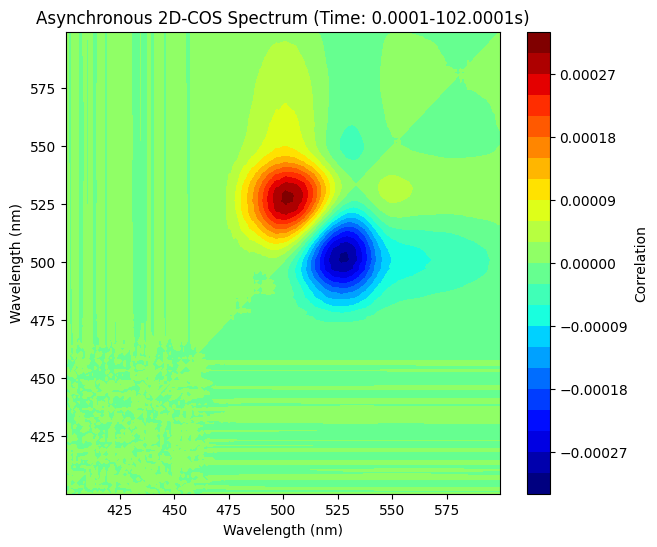

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 400 and 600 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 400 <= w <= 600]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (400-600 nm). Check dataset.")

# Define time window
T_MIN = 0.0001  # Set minimum time value (6)
T_MAX = 102.0001 # Set maximum time value (0)
time_filtered_indices = [i for i, t in enumerate(time) if T_MIN <= t <= T_MAX]
time_filtered = time[time_filtered_indices]
od_values_filtered = od_values_filtered[time_filtered_indices, :]

# Ensure valid time filtering
if time_filtered.size == 0:
    raise ValueError("No time points found in the specified range ({}-{}). Check dataset.".format(T_MIN, T_MAX))

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time_filtered) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time_filtered), len(time_filtered)))
for i in range(len(time_filtered)):
    for j in range(len(time_filtered)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time_filtered) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title + f" (Time: {T_MIN}-{T_MAX}s)")
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range and time window
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum')

# Save correlation matrices
#sync_df.to_csv("/mnt/data/DAS_ACN_10uL_sync_filtered.csv")
#async_df.to_csv("/mnt/data/DAS_ACN_10uL_async_filtered.csv")


In [110]:
import pandas as pd

# Load dataset (assuming CSV format)
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=None)

# Extract wavelength values from the first row (excluding the first column)
wavelengths = data.iloc[0, 1:].astype(float).tolist()

# Extract time values from the first column (excluding the first row)
time_values = data.iloc[1:, 0].astype(float).tolist()

# Extract OD values (excluding first row & first column)
od_values = data.iloc[1:, 1:].astype(float)

# Set proper index and columns
od_values.columns = wavelengths  # Assign wavelengths as column headers
od_values.index = time_values    # Assign time values as row index

# Define wavelength and time ranges
wavelength_min, wavelength_max = 425, 730
time_ranges = [(0, 100), (100, 200), (200, 300)]

# Filter wavelengths within range
filtered_wavelengths = [w for w in wavelengths if wavelength_min <= w <= wavelength_max]

# Iterate over each time range and extract OD values
for idx, (t_min, t_max) in enumerate(time_ranges, 1):
    # Filter time values
    filtered_time = [t for t in time_values if t_min <= t <= t_max]

    # Extract OD values for the filtered time and wavelength ranges
    filtered_od = od_values.loc[filtered_time, filtered_wavelengths]

    # Create new DataFrame with extracted values
    filtered_df = pd.DataFrame(filtered_od)

    # Save to CSV
    output_filename = f"Filtered_Data_{idx}.csv"
    filtered_df.to_csv(output_filename)
    print(f"Saved: {output_filename}")


Saved: Filtered_Data_1.csv
Saved: Filtered_Data_2.csv
Saved: Filtered_Data_3.csv


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

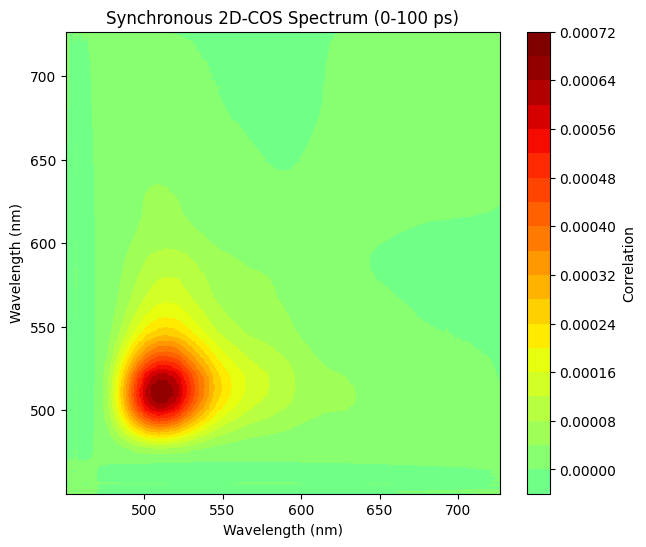

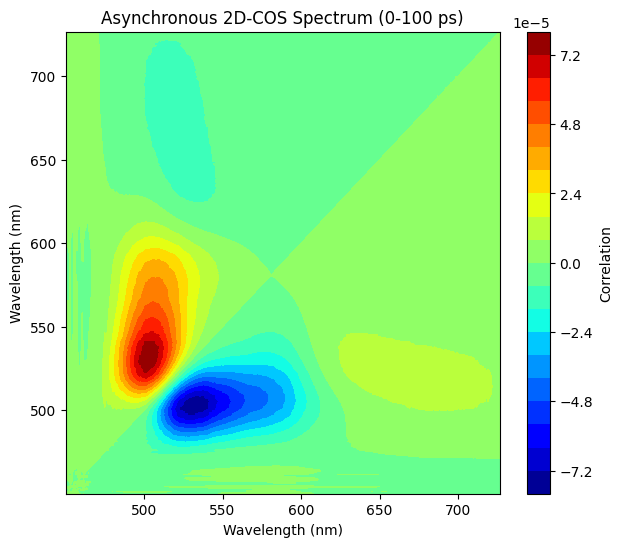

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(0-100).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Function for contour plots (with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax) 
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (0-100 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (0-100 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

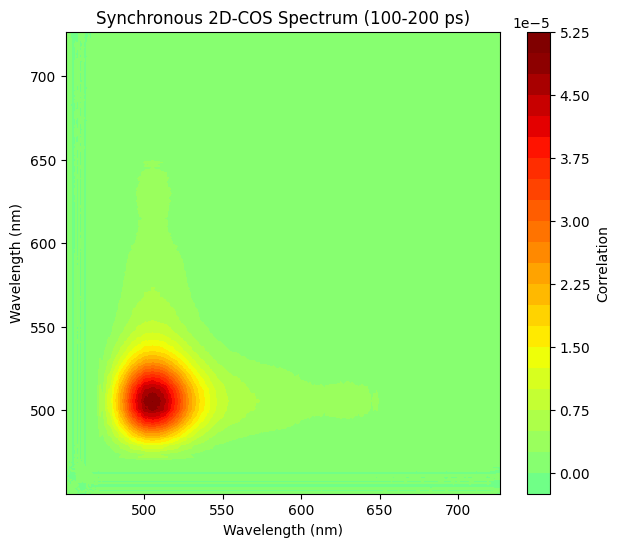

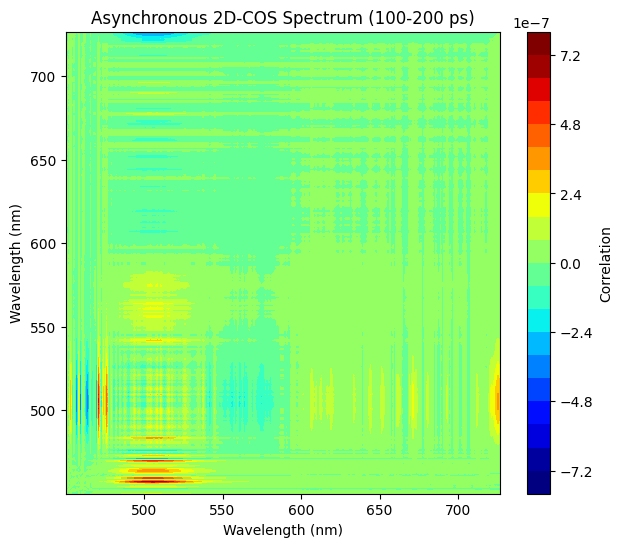

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(100-200).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (100-200 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (100-200 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

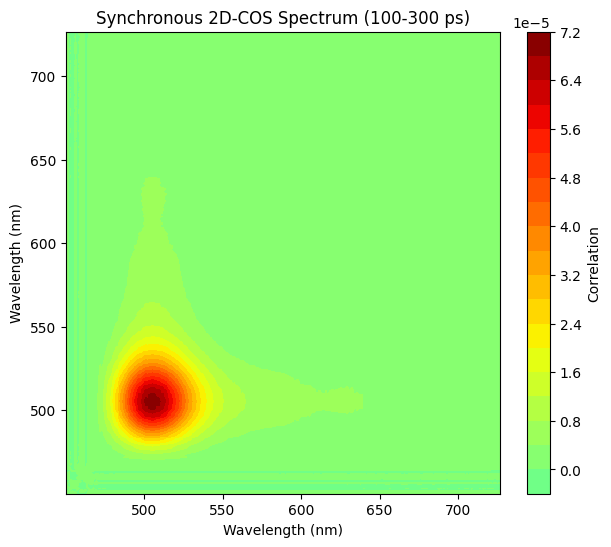

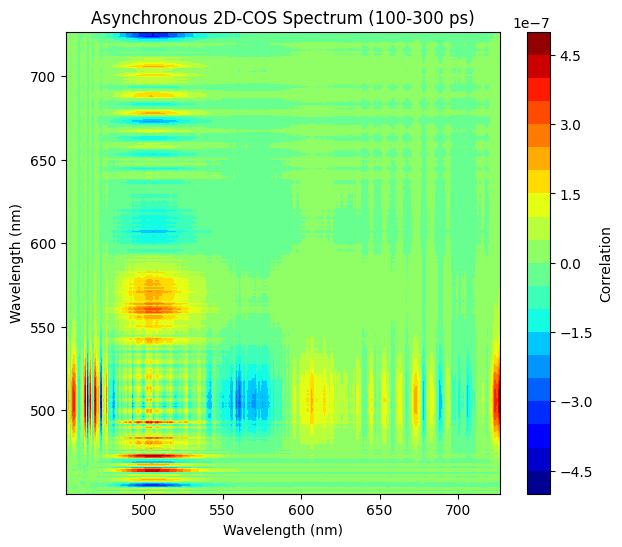

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_1.csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (100-300 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (100-300 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


In [124]:
import numpy as np

def hilbert_matrix(n):
    """Generate an n x n Hilbert matrix."""
    return np.array([[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

# Example: Generate a 5x5 Hilbert matrix
n = 3
H = hilbert_matrix(n)
print(H)


[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


In [21]:
import pandas as pd

# Load dataset (assuming CSV format)
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=None)

# Extract wavelength values from the first row (excluding the first column)
wavelengths = data.iloc[0, 1:].astype(float).tolist()

# Extract time values from the first column (excluding the first row)
time_values = data.iloc[1:, 0].astype(float).tolist()

# Extract OD values (excluding first row & first column)
od_values = data.iloc[1:, 1:].astype(float)

# Set proper index and columns
od_values.columns = wavelengths  # Assign wavelengths as column headers
od_values.index = time_values    # Assign time values as row index

# Define wavelength and time ranges
wavelength_min, wavelength_max = 425, 730
time_ranges = [(0, 3), (3, 6), (6,10)]

# Filter wavelengths within range
filtered_wavelengths = [w for w in wavelengths if wavelength_min <= w <= wavelength_max]

# Iterate over each time range and extract OD values
for idx, (t_min, t_max) in enumerate(time_ranges, 1):
    # Filter time values
    filtered_time = [t for t in time_values if t_min <= t <= t_max]

    # Extract OD values for the filtered time and wavelength ranges
    filtered_od = od_values.loc[filtered_time, filtered_wavelengths]

    # Create new DataFrame with extracted values
    filtered_df = pd.DataFrame(filtered_od)

    # Save to CSV
    output_filename = f"Filtered_Data_{idx}.csv"
    filtered_df.to_csv(output_filename)
    print(f"Saved: {output_filename}")


Saved: Filtered_Data_1.csv
Saved: Filtered_Data_2.csv
Saved: Filtered_Data_3.csv


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

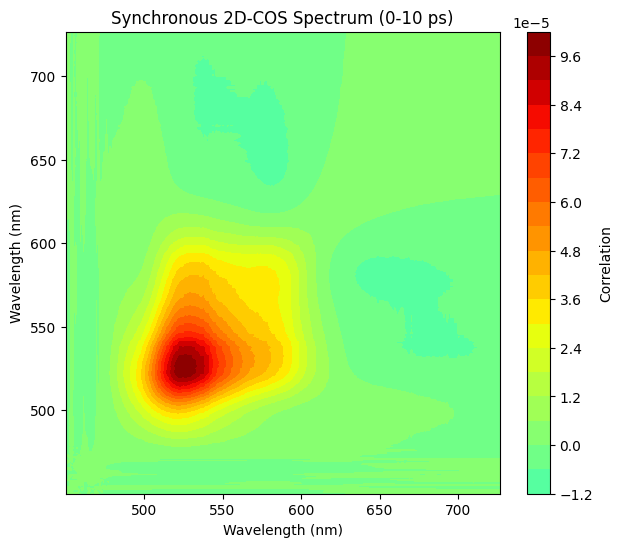

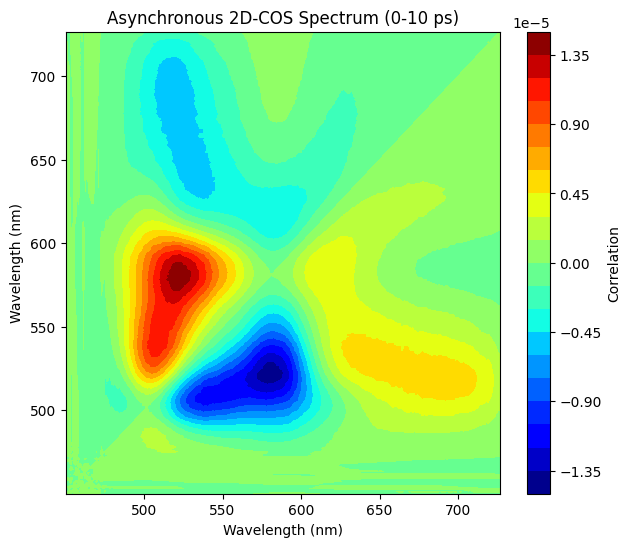

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(0-10).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (0-10 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (0-10 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

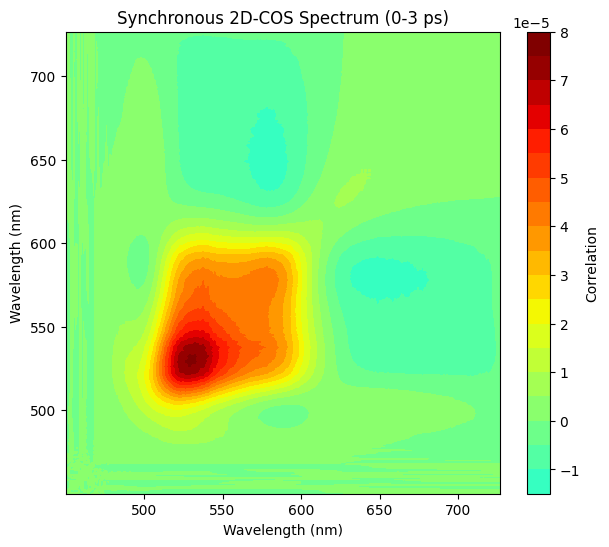

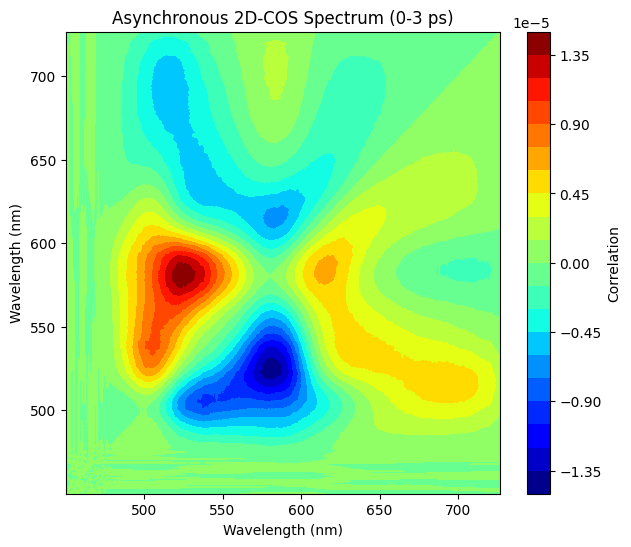

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(0-3).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (0-3 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (0-3 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

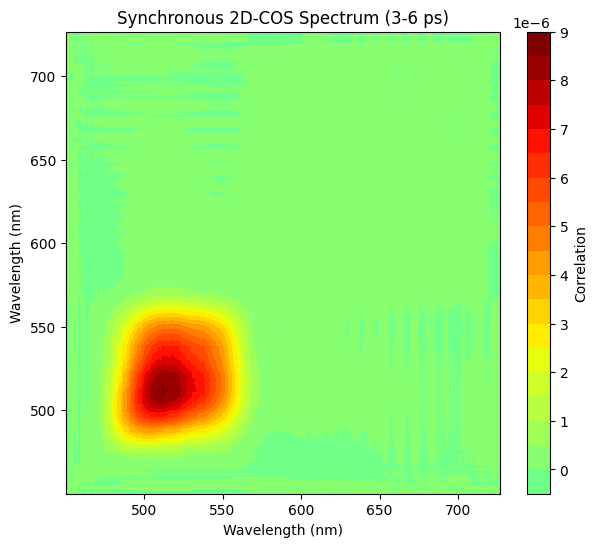

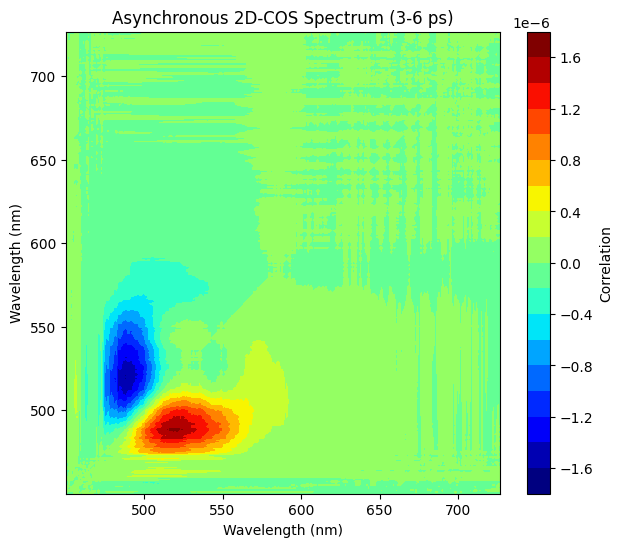

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(3-6).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (3-6 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (3-6 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

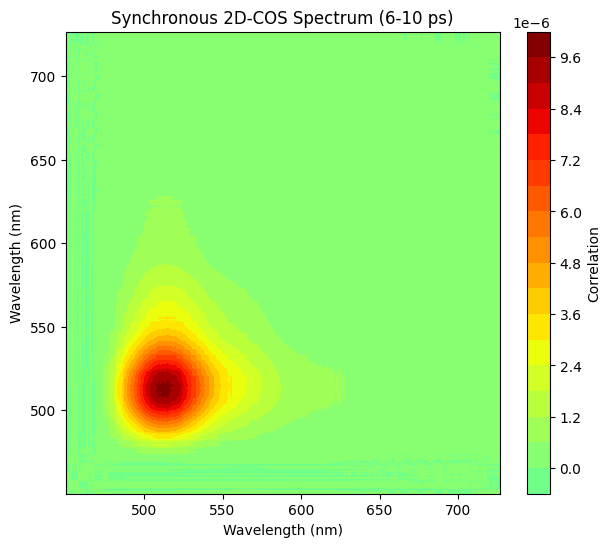

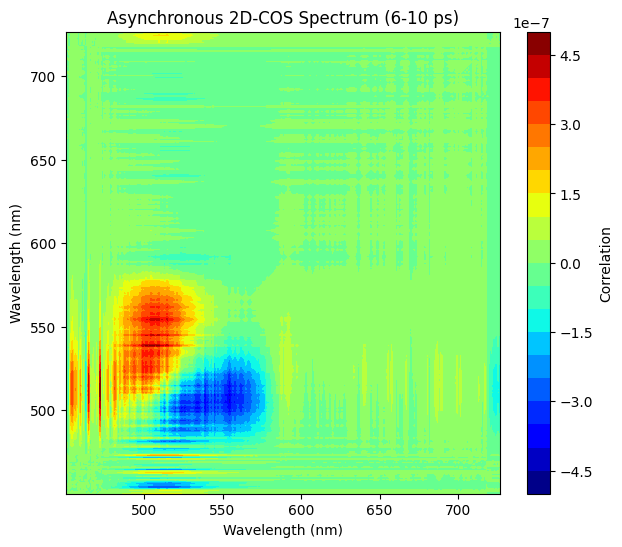

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(6-10).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (6-10 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (6-10 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


In [2]:
import pandas as pd

# Load dataset (assuming CSV format)
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=None)

# Extract wavelength values from the first row (excluding the first column)
wavelengths = data.iloc[0, 1:].astype(float).tolist()

# Extract time values from the first column (excluding the first row)
time_values = data.iloc[1:, 0].astype(float).tolist()

# Extract OD values (excluding first row & first column)
od_values = data.iloc[1:, 1:].astype(float)

# Set proper index and columns
od_values.columns = wavelengths  # Assign wavelengths as column headers
od_values.index = time_values    # Assign time values as row index

# Define wavelength and time ranges
wavelength_min, wavelength_max = 425, 730
time_ranges = [(100, 300)]

# Filter wavelengths within range
filtered_wavelengths = [w for w in wavelengths if wavelength_min <= w <= wavelength_max]

# Iterate over each time range and extract OD values
for idx, (t_min, t_max) in enumerate(time_ranges, 1):
    # Filter time values
    filtered_time = [t for t in time_values if t_min <= t <= t_max]

    # Extract OD values for the filtered time and wavelength ranges
    filtered_od = od_values.loc[filtered_time, filtered_wavelengths]

    # Create new DataFrame with extracted values
    filtered_df = pd.DataFrame(filtered_od)

    # Save to CSV
    output_filename = f"Filtered_Data_{idx}.csv"
    filtered_df.to_csv(output_filename)
    print(f"Saved: {output_filename}")


Saved: Filtered_Data_1.csv


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

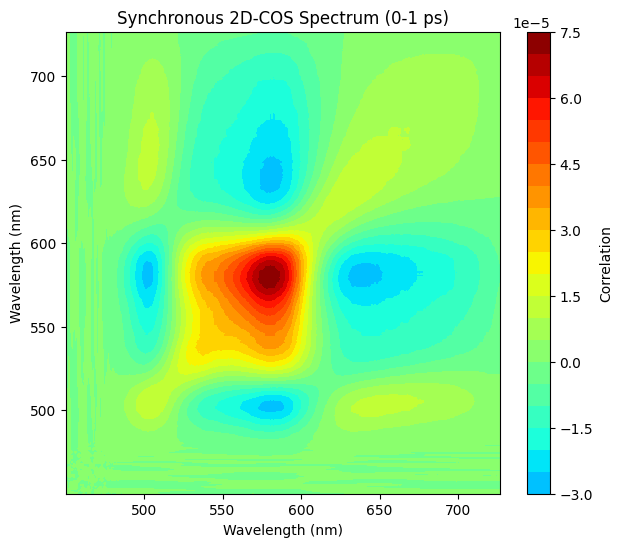

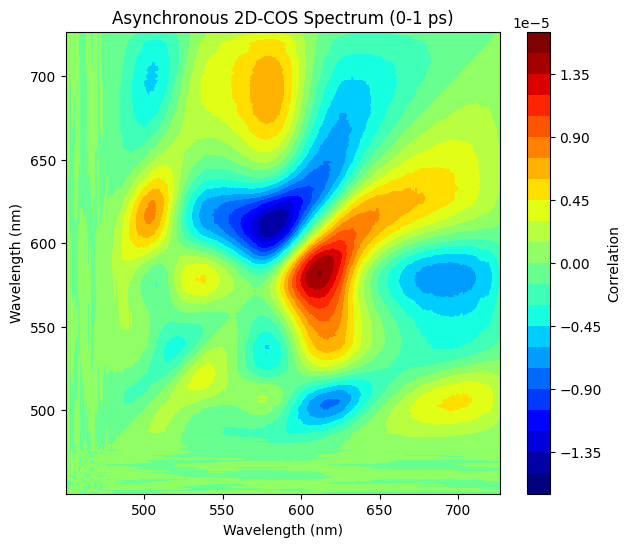

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(0-1).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (0-1 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (0-1 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

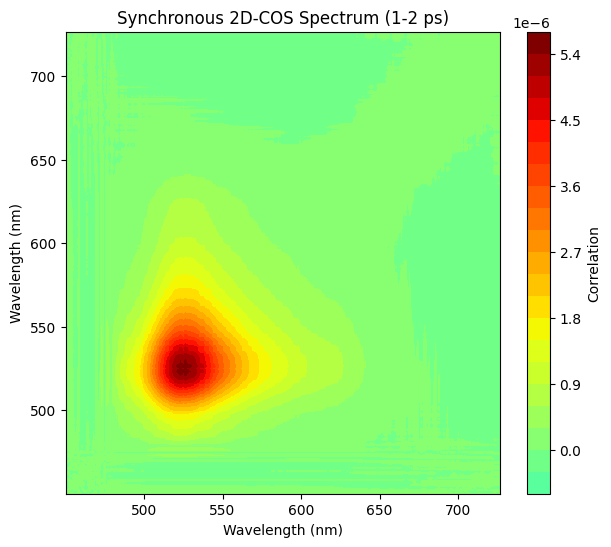

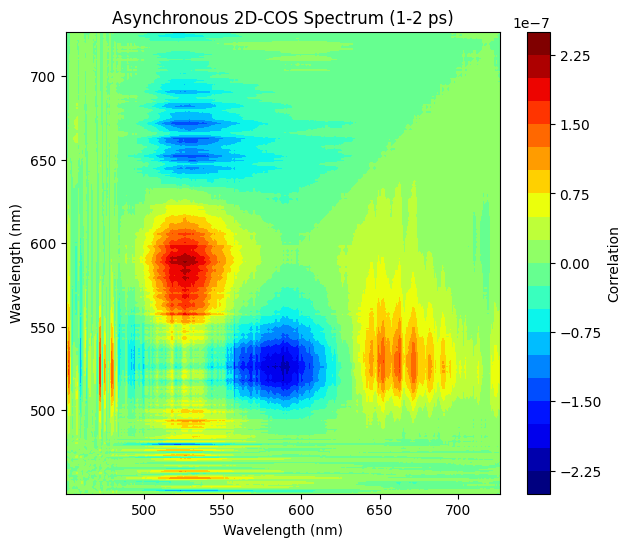

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(1-2).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (1-2 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (1-2 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

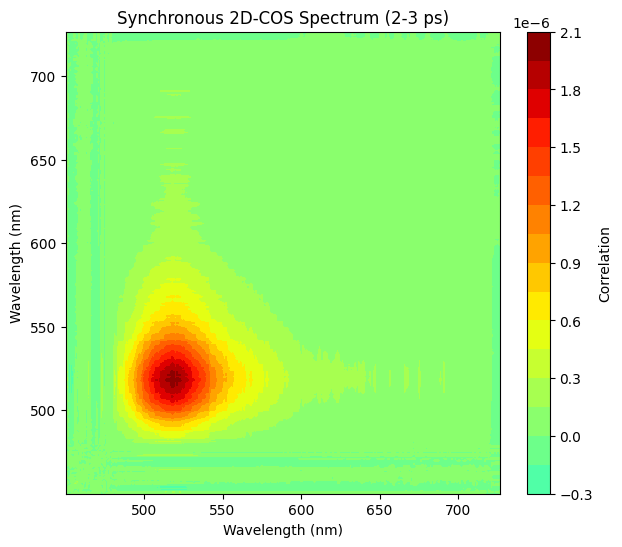

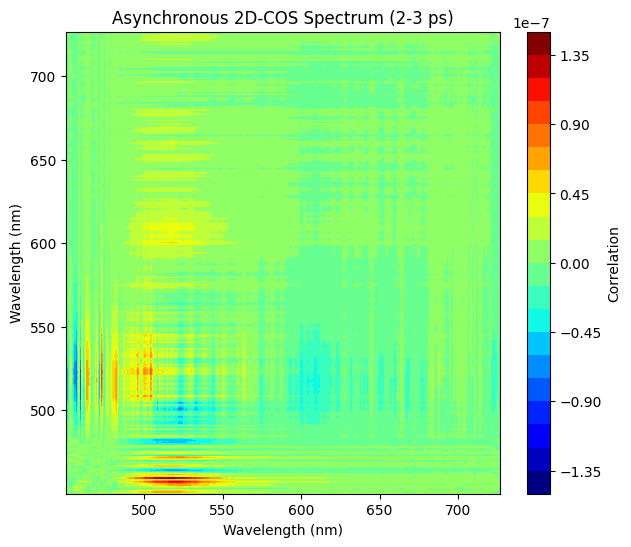

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(2-3).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (2-3 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (2-3 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


In [12]:
import pandas as pd

# Load dataset (assuming CSV format)
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=None)

# Extract wavelength values from the first row (excluding the first column)
wavelengths = data.iloc[0, 1:].astype(float).tolist()

# Extract time values from the first column (excluding the first row)
time_values = data.iloc[1:, 0].astype(float).tolist()

# Extract OD values (excluding first row & first column)
od_values = data.iloc[1:, 1:].astype(float)

# Set proper index and columns
od_values.columns = wavelengths  # Assign wavelengths as column headers
od_values.index = time_values    # Assign time values as row index

# Define wavelength and time ranges
wavelength_min, wavelength_max = 425, 730
time_ranges = [(0, 0.3), (0.3, 0.6), (0.6, 1)]

# Filter wavelengths within range
filtered_wavelengths = [w for w in wavelengths if wavelength_min <= w <= wavelength_max]

# Iterate over each time range and extract OD values
for idx, (t_min, t_max) in enumerate(time_ranges, 1):
    # Filter time values
    filtered_time = [t for t in time_values if t_min <= t <= t_max]

    # Extract OD values for the filtered time and wavelength ranges
    filtered_od = od_values.loc[filtered_time, filtered_wavelengths]

    # Create new DataFrame with extracted values
    filtered_df = pd.DataFrame(filtered_od)

    # Save to CSV
    output_filename = f"Filtered_Data_{idx}.csv"
    filtered_df.to_csv(output_filename)
    print(f"Saved: {output_filename}")


Saved: Filtered_Data_1.csv
Saved: Filtered_Data_2.csv
Saved: Filtered_Data_3.csv


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

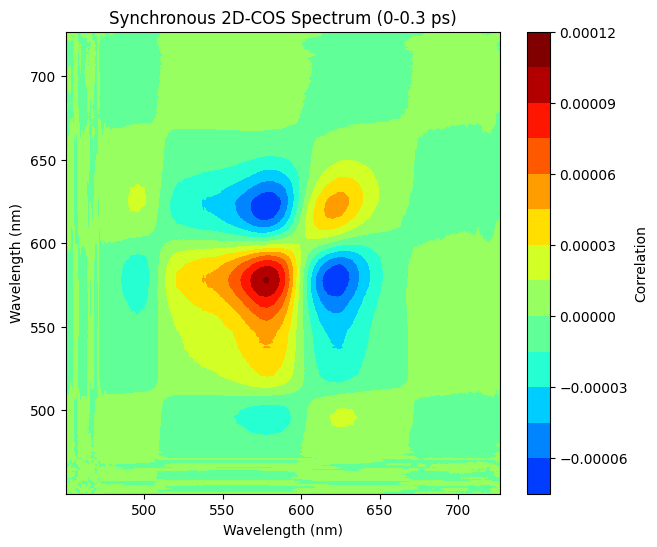

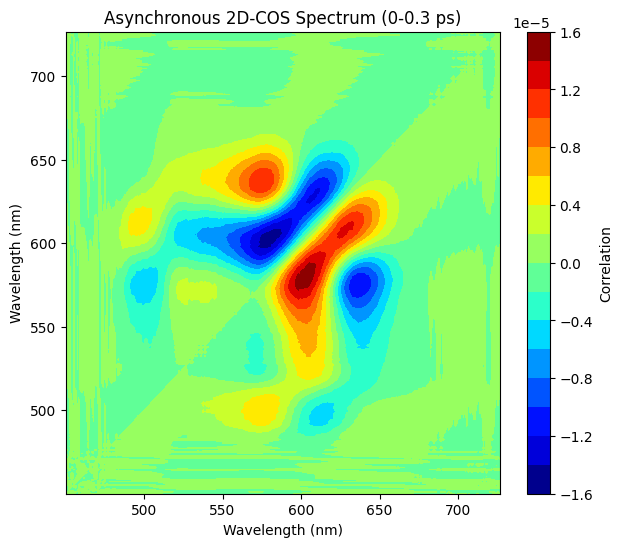

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(0-0.3).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=15, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (0-0.3 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (0-0.3 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

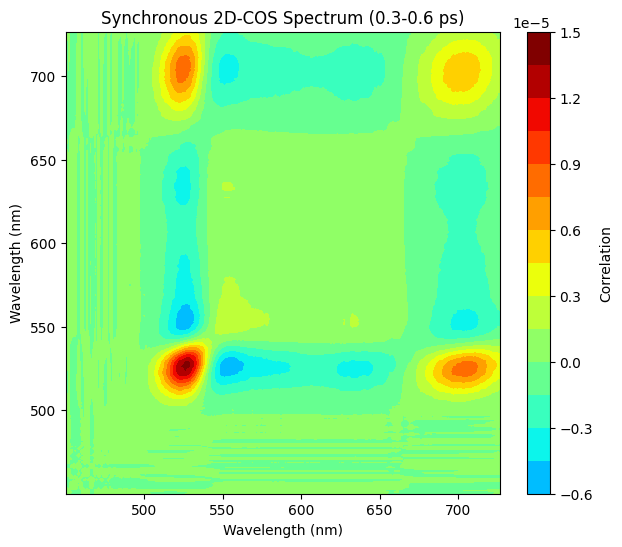

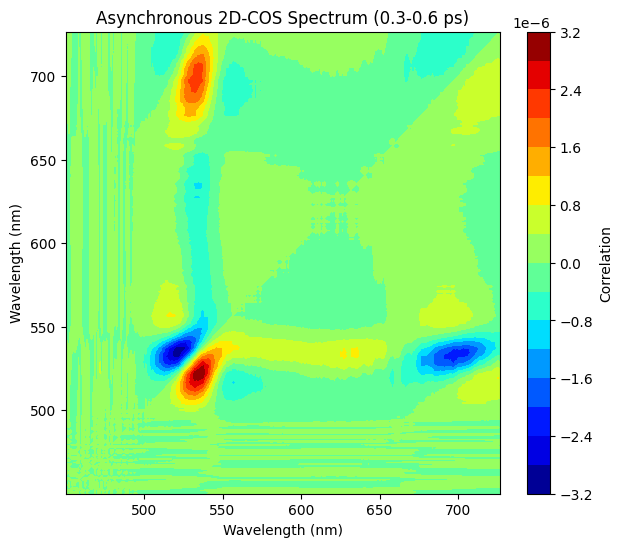

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(0.3-0.6).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=15, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (0.3-0.6 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (0.3-0.6 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

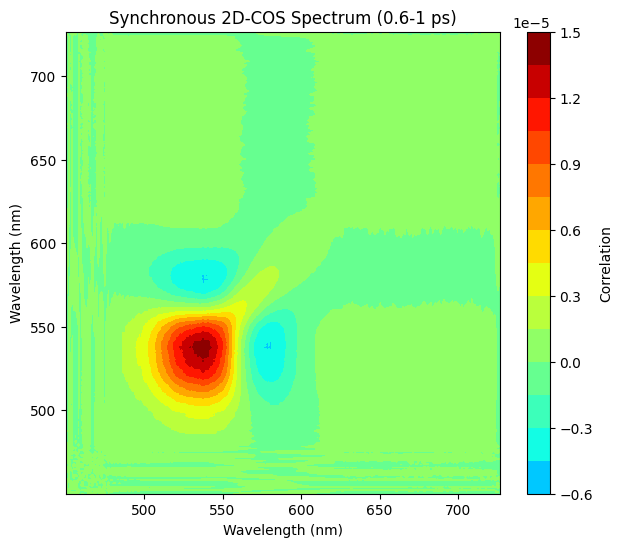

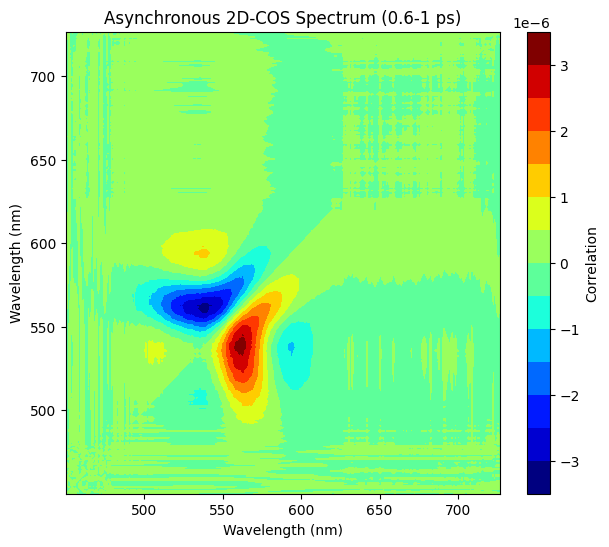

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.linalg import hilbert

# Read the dataset
data = pd.read_csv("Filtered_Data_(0.6-1).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=15, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (0.6-1 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (0.6-1 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")


In [28]:
import pandas as pd

# Load dataset (assuming CSV format)
data = pd.read_csv("DAS_ACN_10uL (1).csv", header=None)

# Extract wavelength values from the first row (excluding the first column)
wavelengths = data.iloc[0, 1:].astype(float).tolist()

# Extract time values from the first column (excluding the first row)
time_values = data.iloc[1:, 0].astype(float).tolist()

# Extract OD values (excluding first row & first column)
od_values = data.iloc[1:, 1:].astype(float)

# Set proper index and columns
od_values.columns = wavelengths  # Assign wavelengths as column headers
od_values.index = time_values    # Assign time values as row index

# Define wavelength and time ranges
wavelength_min, wavelength_max = 425, 730
time_ranges = [(1, 1.5), (1.5, 2)]

# Filter wavelengths within range
filtered_wavelengths = [w for w in wavelengths if wavelength_min <= w <= wavelength_max]

# Iterate over each time range and extract OD values
for idx, (t_min, t_max) in enumerate(time_ranges, 1):
    # Filter time values
    filtered_time = [t for t in time_values if t_min <= t <= t_max]

    # Extract OD values for the filtered time and wavelength ranges
    filtered_od = od_values.loc[filtered_time, filtered_wavelengths]

    # Create new DataFrame with extracted values
    filtered_df = pd.DataFrame(filtered_od)

    # Save to CSV
    output_filename = f"Filtered_Data_{idx}.csv"
    filtered_df.to_csv(output_filename)
    print(f"Saved: {output_filename}")


Saved: Filtered_Data_1.csv
Saved: Filtered_Data_2.csv


Extracted Wavelengths Min: 426.1
Extracted Wavelengths Max: 726.49
All Extracted Wavelengths: [426.1  427.14 428.19 429.23 430.27 431.32 432.36 433.4  434.45 435.49
 436.53 437.57 438.62 439.66 440.7  441.75 442.79 443.83 444.88 445.92
 446.96 448.01 449.05 450.09 451.13 452.18 453.22 454.26 455.31 456.35
 457.39 458.44 459.48 460.52 461.56 462.61 463.65 464.69 465.74 466.78
 467.82 468.87 469.91 470.95 471.99 473.04 474.08 475.12 476.17 477.21
 478.25 479.3  480.34 481.38 482.43 483.47 484.51 485.55 486.6  487.64
 488.68 489.73 490.77 491.81 492.86 493.9  494.94 495.98 497.03 498.07
 499.11 500.16 501.2  502.24 503.29 504.33 505.37 506.41 507.46 508.5
 509.54 510.59 511.63 512.67 513.72 514.76 515.8  516.85 517.89 518.93
 519.97 521.02 522.06 523.1  524.15 525.19 526.23 527.28 528.32 529.36
 530.4  531.45 532.49 533.53 534.58 535.62 536.66 537.71 538.75 539.79
 540.83 541.88 542.92 543.96 545.01 546.05 547.09 548.14 549.18 550.22
 551.27 552.31 553.35 554.39 555.44 556.48 557.52 558.5

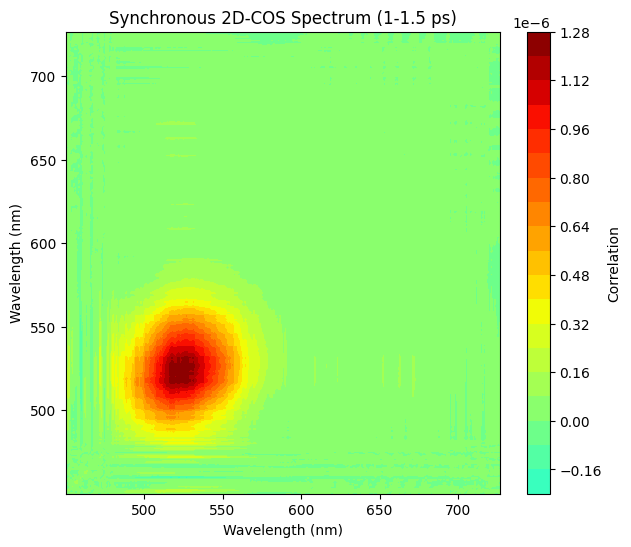

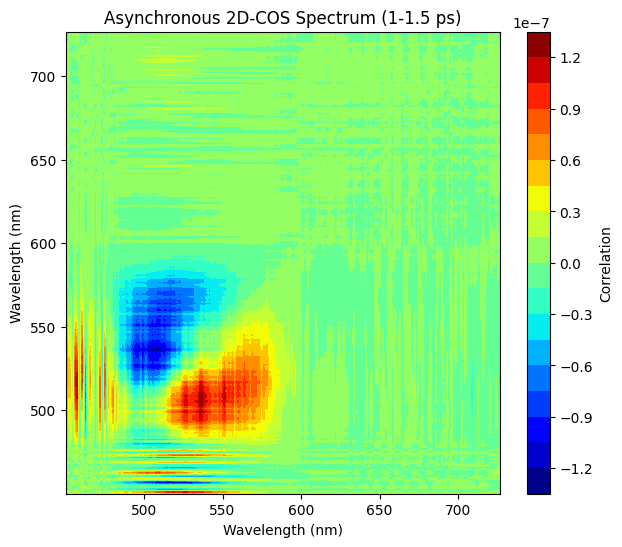

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("Filtered_Data_(1.5-2).csv", header=0, index_col=0)

# Extract values correctly
wavelengths = data.columns[1:].astype(float).values  # Extract wavelengths from column headers
time = data.iloc[1:, 0].astype(float).values  # Extract time from the first column
od_values = data.iloc[1:, 1:].astype(float).values  # Extract OD values excluding headers

# Debugging: Check extracted wavelength values
print("Extracted Wavelengths Min:", np.min(wavelengths))
print("Extracted Wavelengths Max:", np.max(wavelengths))
print("All Extracted Wavelengths:", wavelengths)

# Filter wavelength range between 450 and 730 nm
wavelength_filtered_indices = [i for i, w in enumerate(wavelengths) if 450 <= w <= 730]
wavelengths_filtered = wavelengths[wavelength_filtered_indices]
od_values_filtered = od_values[:, wavelength_filtered_indices]

# Ensure valid filtering
if wavelengths_filtered.size == 0:
    raise ValueError("No wavelengths found in the specified range (450-730 nm). Check dataset.")

# Mean-center the data (Dynamic Spectrum Analysis)
spec_mean_centered = od_values_filtered - od_values_filtered.mean(axis=0)  # Mean-center across time axis

# Compute synchronous correlation matrix
sync_matrix = np.dot(spec_mean_centered.T, spec_mean_centered) / (len(time) - 1)
print("Sync Matrix Shape:", sync_matrix.shape)
sync_df = pd.DataFrame(sync_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Compute Hilbert-Noda transformation matrix
noda = np.zeros((len(time), len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        if i != j:
            noda[i, j] = 1 / (np.pi * (j - i))

# Compute asynchronous correlation matrix
async_matrix = np.dot(spec_mean_centered.T, np.dot(noda, spec_mean_centered)) / (len(time) - 1)
print("Async Matrix Shape:", async_matrix.shape)
async_df = pd.DataFrame(async_matrix, index=wavelengths_filtered, columns=wavelengths_filtered)

# Define function for contour plots (now with filtered wavelengths on both axes)
def contour_plot(matrix, title):
    x, y = np.meshgrid(wavelengths_filtered, wavelengths_filtered)
    zmax = np.max(np.abs(matrix.values))
    plt.figure(figsize=(7, 6))
    plt.contourf(x, y, matrix.values, levels=20, cmap='jet', vmin=-zmax, vmax=zmax)  # Improved colormap
    plt.colorbar(label='Correlation')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Wavelength (nm)')
    plt.title(title)
    plt.xlim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))  # Set correct axis limits
    plt.ylim(np.min(wavelengths_filtered), np.max(wavelengths_filtered))
    plt.show()

# Plot synchronous and asynchronous correlation spectra based on filtered wavelength range
contour_plot(sync_df, 'Synchronous 2D-COS Spectrum (1-1.5 ps)')
contour_plot(async_df, 'Asynchronous 2D-COS Spectrum (1-1.5 ps)')

# Save correlation matrices
#sync_df.to_csv("DAS_ACN_10uL_sync_filtered_new.csv")
#async_df.to_csv("DAS_ACN_10uL_async_filtered_new.csv")
